# Arquitectura de red convolucional

Ya hemos visto las tres cápas más comunes de redes convolucionales, así que vamos a construir una red convolucional para intentar resolver el problema de clasificación de imágenes [Intel Image Classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification). Para descargarlo solo es necesario tener una cuenta en Kaggle

Si no conoces Kaggle es la página más importante de competiciones de deep learning, por lo que te animo a que entres, le eches un ojo y empieces a competir, ya que a caminar se aprende caminando. Es decir, la mejor manera de aprender es resolver problemas reales

Nos descargamos el dataset en la [página](https://www.kaggle.com/datasets/puneet6060/intel-image-classification) del dataset, dándole al botón *Download*. En mi caso lo descargaré en el path `data/intel`

## EDA

Vemos el archivo que se ha descargado

In [1]:
!ls data/intel

archive.zip


Lo descomprimimos

In [2]:
!unzip -q data/intel/archive.zip -d data/intel

Vemos qué tenemos ahora

In [1]:
!ls data/intel

seg_pred  seg_test  seg_train


Aprovechamos y borramos el *.zip* para ahorrar espacio

In [ ]:
!rm data/intel/archive.zip

Vemos primero qué hay dentro de la carpeta `seg_train`

In [3]:
!ls data/intel/seg_train/seg_train

buildings  forest  glacier  mountain  sea  street


Vemos que hay carpetas con cada una de las clases del dataset, vemos qué hay dentro de una de las carpetas

In [4]:
!ls data/intel/seg_train/seg_train/buildings

0.jpg	   12578.jpg  14916.jpg  17468.jpg  20017.jpg  4600.jpg  7382.jpg
10006.jpg  12590.jpg  14918.jpg  17479.jpg  20027.jpg  4620.jpg  7383.jpg
10014.jpg  125.jpg    14947.jpg  17480.jpg  2002.jpg   4621.jpg  739.jpg
10018.jpg  12602.jpg  14952.jpg  17491.jpg  20048.jpg  4623.jpg  7418.jpg
1001.jpg   12615.jpg  14958.jpg  17495.jpg  20054.jpg  4630.jpg  742.jpg
10029.jpg  12617.jpg  14968.jpg  17503.jpg  2038.jpg   4631.jpg  7439.jpg
10032.jpg  12629.jpg  14984.jpg  17516.jpg  2041.jpg   4634.jpg  7443.jpg
10056.jpg  12632.jpg  14991.jpg  1751.jpg   2043.jpg   463.jpg	 7455.jpg
1009.jpg   12636.jpg  1501.jpg	 17520.jpg  2059.jpg   4667.jpg  7463.jpg
10113.jpg  1263.jpg   15026.jpg  17537.jpg  2069.jpg   4686.jpg  7471.jpg
10126.jpg  12649.jpg  15030.jpg  17539.jpg  2076.jpg   4715.jpg  7478.jpg
1012.jpg   12659.jpg  1503.jpg	 1753.jpg   2083.jpg   4748.jpg  747.jpg
10144.jpg  12668.jpg  15042.jpg  17541.jpg  2088.jpg   4770.jpg  7491.jpg
10151.jpg  12669.jpg  15045.jpg  17545.jpg  20

Vemos que todo son imágenes

Vemos ahora dentro de la carpeta seg_test

In [5]:
!ls data/intel/seg_test/seg_test

buildings  forest  glacier  mountain  sea  street


In [6]:
!ls data/intel/seg_test/seg_test/buildings

20057.jpg  20637.jpg  21271.jpg  21817.jpg  22421.jpg  23087.jpg  23652.jpg
20060.jpg  20646.jpg  21279.jpg  21827.jpg  22423.jpg  23097.jpg  23660.jpg
20061.jpg  20648.jpg  21286.jpg  21841.jpg  22426.jpg  23100.jpg  23675.jpg
20064.jpg  20663.jpg  21291.jpg  21897.jpg  22442.jpg  23104.jpg  23683.jpg
20073.jpg  20666.jpg  21293.jpg  21905.jpg  22447.jpg  23106.jpg  23692.jpg
20074.jpg  20688.jpg  21294.jpg  21923.jpg  22448.jpg  23109.jpg  23726.jpg
20078.jpg  20709.jpg  21296.jpg  21929.jpg  22462.jpg  23136.jpg  23727.jpg
20083.jpg  20710.jpg  21298.jpg  21945.jpg  22486.jpg  23143.jpg  23733.jpg
20094.jpg  20723.jpg  21309.jpg  21948.jpg  22496.jpg  23144.jpg  23735.jpg
20096.jpg  20725.jpg  21318.jpg  21955.jpg  22531.jpg  23159.jpg  23737.jpg
20113.jpg  20730.jpg  21319.jpg  21962.jpg  22534.jpg  23175.jpg  23741.jpg
20131.jpg  20733.jpg  21339.jpg  21970.jpg  22558.jpg  23179.jpg  23757.jpg
20140.jpg  20748.jpg  21360.jpg  21977.jpg  22562.jpg  23188.jpg  23776.jpg
20177.jpg  2

Vemos que la carpeta de test es igual que la de train

Por último vemos la carpeta seg_pred

In [7]:
!ls data/intel/seg_pred/seg_pred

10004.jpg  13296.jpg  16412.jpg  19543.jpg  22613.jpg  3947.jpg  6943.jpg
10005.jpg  13297.jpg  16415.jpg  19549.jpg  22615.jpg  3953.jpg  6948.jpg
10012.jpg  13299.jpg  16424.jpg  19557.jpg  22618.jpg  3962.jpg  6950.jpg
10013.jpg  132.jpg    16428.jpg  19558.jpg  22621.jpg  3966.jpg  6951.jpg
10017.jpg  13302.jpg  16429.jpg  19560.jpg  22622.jpg  3970.jpg  6952.jpg
10021.jpg  13303.jpg  16436.jpg  19561.jpg  22627.jpg  3975.jpg  6957.jpg
10034.jpg  13305.jpg  16442.jpg  19562.jpg  22630.jpg  3976.jpg  695.jpg
10038.jpg  1330.jpg   16444.jpg  19564.jpg  22638.jpg  3979.jpg  6964.jpg
1003.jpg   13316.jpg  16445.jpg  19568.jpg  22641.jpg  3981.jpg  6965.jpg
10040.jpg  13318.jpg  16446.jpg  19569.jpg  22649.jpg  3982.jpg  6966.jpg
10043.jpg  13321.jpg  16447.jpg  19570.jpg  22651.jpg  3983.jpg  6974.jpg
10045.jpg  13325.jpg  16449.jpg  19572.jpg  22658.jpg  3986.jpg  6980.jpg
10047.jpg  13326.jpg  1644.jpg	 19575.jpg  22659.jpg  3987.jpg  6988.jpg
10048.jpg  13329.jpg  16454.jpg  19577.j

En la carpeta de pred solo hay imágenes, no hay carpetas para cada clase

## Dataframes

Una vez estudiamos los datos comenzamos a prepararlos para entrenar una red. Primero nos creamos tres dataframes, uno de train, otro de test y otro de pred

In [8]:
import os
import pandas as pd

df_building = pd.DataFrame({'folder': 'data/intel/seg_train/seg_train/buildings/', 'filename': os.listdir('data/intel/seg_train/seg_train/buildings'), 'class': 'buildings'})
df_forest = pd.DataFrame({'folder': 'data/intel/seg_train/seg_train/forest/', 'filename': os.listdir('data/intel/seg_train/seg_train/forest'), 'class': 'forest'})
df_glacier = pd.DataFrame({'folder': 'data/intel/seg_train/seg_train/glacier/', 'filename': os.listdir('data/intel/seg_train/seg_train/glacier'), 'class': 'glacier'})
df_mountain = pd.DataFrame({'folder': 'data/intel/seg_train/seg_train/mountain/', 'filename': os.listdir('data/intel/seg_train/seg_train/mountain'), 'class': 'mountain'})
df_sea = pd.DataFrame({'folder': 'data/intel/seg_train/seg_train/sea/', 'filename': os.listdir('data/intel/seg_train/seg_train/sea'), 'class': 'sea'})
df_street = pd.DataFrame({'folder': 'data/intel/seg_train/seg_train/street/', 'filename': os.listdir('data/intel/seg_train/seg_train/street'), 'class': 'street'})
df_train = pd.concat([df_building, df_forest, df_glacier, df_mountain, df_sea, df_street], ignore_index=True)
df_train['path'] = df_train['folder'] + df_train['filename']
cols = df_train.columns.tolist()
cols = cols[-1:] + cols[-2:-1]
df_train = df_train[cols]
df_train.head()

,path,class
0,data/intel/seg_train/seg_train/buildings/16457...,buildings
1,data/intel/seg_train/seg_train/buildings/17516...,buildings
2,data/intel/seg_train/seg_train/buildings/17636...,buildings
3,data/intel/seg_train/seg_train/buildings/13253...,buildings
4,data/intel/seg_train/seg_train/buildings/11366...,buildings


In [9]:
df_building = pd.DataFrame({'folder': 'data/intel/seg_test/seg_test/buildings/', 'filename': os.listdir('data/intel/seg_test/seg_test/buildings'), 'class': 'buildings'})
df_forest = pd.DataFrame({'folder': 'data/intel/seg_test/seg_test/forest/', 'filename': os.listdir('data/intel/seg_test/seg_test/forest'), 'class': 'forest'})
df_glacier = pd.DataFrame({'folder': 'data/intel/seg_test/seg_test/glacier/', 'filename': os.listdir('data/intel/seg_test/seg_test/glacier'), 'class': 'glacier'})
df_mountain = pd.DataFrame({'folder': 'data/intel/seg_test/seg_test/mountain/', 'filename': os.listdir('data/intel/seg_test/seg_test/mountain'), 'class': 'mountain'})
df_sea = pd.DataFrame({'folder': 'data/intel/seg_test/seg_test/sea/', 'filename': os.listdir('data/intel/seg_test/seg_test/sea'), 'class': 'sea'})
df_street = pd.DataFrame({'folder': 'data/intel/seg_test/seg_test/street/', 'filename': os.listdir('data/intel/seg_test/seg_test/street'), 'class': 'street'})
df_test = pd.concat([df_building, df_forest, df_glacier, df_mountain, df_sea, df_street], ignore_index=True)
df_test['path'] = df_test['folder'] + df_test['filename']
cols = df_test.columns.tolist()
cols = cols[-1:] + cols[-2:-1]
df_test = df_test[cols]
df_test.head()

,path,class
0,data/intel/seg_test/seg_test/buildings/22383.jpg,buildings
1,data/intel/seg_test/seg_test/buildings/20646.jpg,buildings
2,data/intel/seg_test/seg_test/buildings/21793.jpg,buildings
3,data/intel/seg_test/seg_test/buildings/20524.jpg,buildings
4,data/intel/seg_test/seg_test/buildings/21764.jpg,buildings


In [10]:
df_pred = pd.DataFrame({'folder': 'data/intel/seg_pred/seg_pred/', 'filename': os.listdir('data/intel/seg_pred/seg_pred')})
df_pred['path'] = df_pred['folder'] + df_pred['filename']
cols = df_pred.columns.tolist()
cols = cols[2]
df_pred = df_pred[cols]
df_pred.head()

0    data/intel/seg_pred/seg_pred/19065.jpg
1    data/intel/seg_pred/seg_pred/23396.jpg
2     data/intel/seg_pred/seg_pred/6066.jpg
3     data/intel/seg_pred/seg_pred/7782.jpg
4    data/intel/seg_pred/seg_pred/19757.jpg
Name: path, dtype: object

Creamos un diccionario con las clases

In [11]:
classes = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

## Dataset

Creamos ahora un dataset

In [12]:
import torch
import cv2

class IntelDataset(torch.utils.data.Dataset):
    def __init__(self, df, pred=False,):
        self.df = df
        self.pred = pred

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if not self.pred:
            img = cv2.imread(self.df.iloc[idx, 0])  # Read image
        else:
            img = cv2.imread(self.df.iloc[idx]) # Read image
        if img.shape[0] != 150 or img.shape[1] != 150:  # Resize image if needed
            img = cv2.resize(img, (150, 150))
        img = torch.from_numpy(img).permute(2, 0, 1).float()    # Convert to tensor and permute dimensions
        if not self.pred:
            label = torch.tensor(classes[self.df.iloc[idx, 1]]) # Get label
            return img, label
        return img

ds_train = IntelDataset(df_train)
ds_test = IntelDataset(df_test)
ds_pred = IntelDataset(df_pred, pred=True)

Veamos una muestra

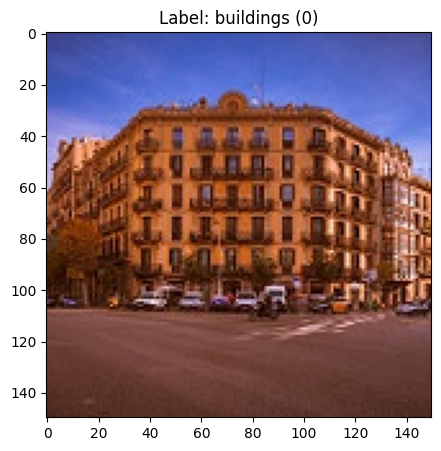

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

np.random.seed(10)
idx = np.random.randint(0, len(ds_train))
sample_img, sample_label = ds_train[idx]

key = [k for k, v in classes.items() if v == sample_label][0]
fig = plt.figure(figsize=(5, 5))
sample_img = sample_img.permute(1, 2, 0).numpy().astype(np.uint8)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.title(f"Label: {key} ({sample_label})")
plt.show()

## Dataloader

Creamos ahora los dataloaders

In [14]:
BS_train = 32
BS_test = 32

dl_train = torch.utils.data.DataLoader(ds_train, batch_size=BS_train, shuffle=True)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size=BS_test, shuffle=True)

In [15]:
batch_img, batch_label = next(iter(dl_train))
print(batch_img.shape)

torch.Size([32, 3, 150, 150])


## Model

In [16]:
num_clases = len(classes)
num_clases

6

Como vemos hay 6 clases, por lo que a la salida de la red tiene que haber 6 neuronas

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ConvolutionalNet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0) # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 2x2 max pooling
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0) # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 34 * 34, 120)     # 18496 input neurons, 120 output neurons
        self.fc2 = nn.Linear(120, 84)               # 120 input neurons, 84 output neurons
        self.fc3 = nn.Linear(84, num_classes)       # 84 input neurons, 6 output neurons
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))   # Convolutional layer 1 --> 6x146x146
        x = self.pool(x)            # Pooling layer 1 --> 6x73x73
        x = F.relu(self.conv2(x))   # Convolutional layer 2 --> 16x69x69
        x = self.pool(x)            # Pooling layer 2 --> 16x34x34
        x = torch.flatten(x, start_dim=1)     # flatten all dimensions except batch
        x = F.relu(self.fc1(x))     # Fully connected layer 1
        x = F.relu(self.fc2(x))     # Fully connected layer 2
        x = self.fc3(x)             # Fully connected layer 3
        x = self.softmax(x)         # Softmax activation
        return x


model = ConvolutionalNet(num_clases)
model

ConvolutionalNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=18496, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=6, bias=True)
  (softmax): Softmax(dim=1)
)

Probamos que el modelo funciona con un tensor aleatorio

In [18]:
result = model(torch.rand(1, 3, 150, 150))
result.shape, result

(torch.Size([1, 6]),
 tensor([[0.1901, 0.1609, 0.1523, 0.1509, 0.1666, 0.1792]],
        grad_fn=<SoftmaxBackward0>))

Probamos que el modelo funciona con una imagen

In [20]:
sample_img, sample_label = ds_train[idx]
result = model(sample_img.unsqueeze(0))
result.shape, result

(torch.Size([1, 6]),
 tensor([[0.1194, 0.6230, 0.1060, 0.0351, 0.0466, 0.0700]],
        grad_fn=<SoftmaxBackward0>))

Llevamos el modelo a la GPU

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
model.to(device)

Using cuda device


ConvolutionalNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=18496, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=6, bias=True)
  (softmax): Softmax(dim=1)
)

## Función de pérdida y optimizador

Definimos learning rate, función de loss y optimizador

In [22]:
LR = 1e-3
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)

## Ciclo de entrenamiento

In [23]:
num_prints = 2

def train_loop(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    mul = 1
    model.train()
    mean_loss = 0
    num_batches = len(dataloader)

    for batch, (X, y) in enumerate(dataloader):
        # X and y to device
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        preds = model(X)
        loss = loss_fn(preds, y)
        mean_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch+1) % int(len(dataloader)/num_prints) == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            mul += 1
    
    return mean_loss/num_batches


def val_loop(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    val_loss, correct = 0, 0
    model.eval()

    with torch.no_grad():
        for X, y in dataloader:
            # X and y to device
            X, y = X.to(device), y.to(device)
            
            preds = model(X)
            val_loss += loss_fn(preds, y).item()
            correct += (preds.argmax(1) == y).type(torch.float).sum().item()

    val_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {val_loss:>8f} \n")

    return val_loss, correct

In [24]:
epochs = 12
losses_train = []
losses_val = []
accuracies_val = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    mean_loss =  train_loop(dl_train, model, loss_fn, optimizer, device)
    losses_train.append(mean_loss)
    mean_loss, accuracy = val_loop(dl_test, model, loss_fn, device)
    losses_val.append(mean_loss)
    accuracies_val.append(accuracy)
print("Done!")

Epoch 1
-------------------------------
loss: 1.793591  [ 6976/14034]
loss: 1.856091  [13984/14034]
Test Error: 
 Accuracy: 17.5%, Avg loss: 1.868724 

Epoch 2
-------------------------------
loss: 1.793591  [ 6976/14034]
loss: 1.824841  [13984/14034]
Test Error: 
 Accuracy: 17.5%, Avg loss: 1.868614 

Epoch 3
-------------------------------
loss: 1.856091  [ 6976/14034]
loss: 2.012341  [13984/14034]
Test Error: 
 Accuracy: 17.5%, Avg loss: 1.868503 

Epoch 4
-------------------------------
loss: 1.856091  [ 6976/14034]
loss: 1.949841  [13984/14034]
Test Error: 
 Accuracy: 17.5%, Avg loss: 1.868392 

Epoch 5
-------------------------------
loss: 1.887341  [ 6976/14034]
loss: 1.887341  [13984/14034]
Test Error: 
 Accuracy: 17.5%, Avg loss: 1.868503 

Epoch 6
-------------------------------
loss: 1.824842  [ 6976/14034]
loss: 1.918591  [13984/14034]
Test Error: 
 Accuracy: 17.5%, Avg loss: 1.868724 

Epoch 7
-------------------------------
loss: 1.949841  [ 6976/14034]
loss: 1.856091  [1

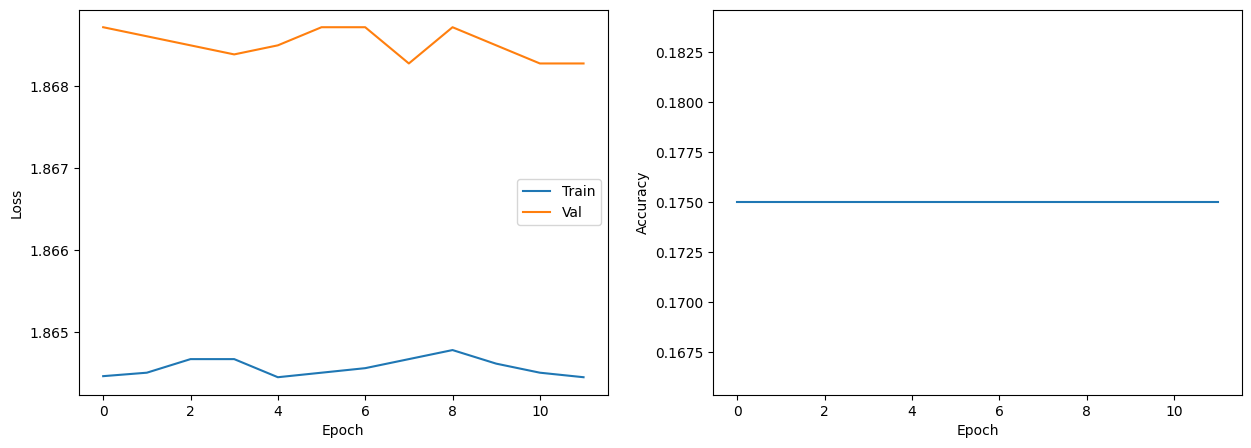

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(losses_train, label='Train')
ax[0].plot(losses_val, label='Val')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(accuracies_val)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
plt.show()

Vemos que obtenemos un error en torno a 1.875. Vemos cómo se comporta con una image del dataset de validación

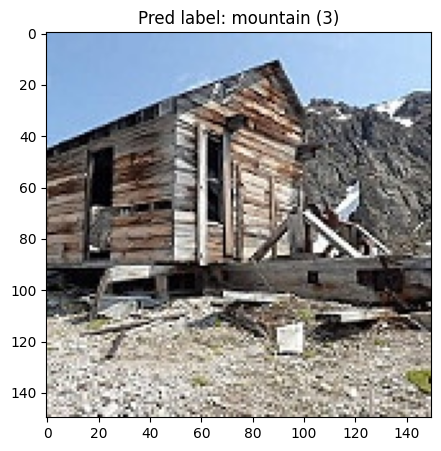

In [26]:
np.random.seed(14)
idx = np.random.randint(0, len(ds_pred))
sample_img = ds_pred[idx]

pred = model(sample_img.unsqueeze(0).to(device))
pred = pred.argmax(1).item()
key = list(classes.keys())[list(classes.values()).index(pred)]
pred, key

fig = plt.figure(figsize=(5, 5))
sample_img = sample_img.permute(1, 2, 0).numpy().astype(np.uint8)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.title(f"Pred label: {key} ({pred})")
plt.show()

No predice muy bien, pero ya veremos como con otras técnicas lo hará mejor